<a href="https://colab.research.google.com/github/amanverma9876/Folder/blob/master/BlueBash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [44]:
#read data set
data = pd.read_csv('/content/train.csv')

In [45]:
#display info
print("Dataset Info:")
print(data.info())
print("\nSample Data:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/bir

In [46]:
#data cleaning & preprocessing     drop unwanted columns
columns_to_drop = ['index', 'beer/beerId', 'beer/brewerId', 'review/timeStruct',
                   'review/timeUnix', 'user/birthdayRaw', 'user/birthdayUnix',
                   'user/profileName']
data.drop(columns=columns_to_drop, inplace=True)


In [47]:
# handle missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
beer/ABV                 0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
user/ageInSeconds    29644
user/gender          22186
dtype: int64


In [64]:
# fill values for numeric column
data['beer/ABV'] = data['beer/ABV'].fillna(data['beer/ABV'].mean())
data['user/ageInSeconds'] = data['user/ageInSeconds'].fillna(data['user/ageInSeconds'].mean())


In [49]:
# encoding categorical column
label_encoder = LabelEncoder()
data['beer/name'] = label_encoder.fit_transform(data['beer/name'])
data['beer/style'] = label_encoder.fit_transform(data['beer/style'])
data['user/gender'] = data['user/gender'].fillna('unknown')
data['user/gender'] = label_encoder.fit_transform(data['user/gender'])

In [50]:
#text features using TF-IDF
tfidf = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf.fit_transform(data['review/text'].fillna('')).toarray()

In [51]:
#adding TF-IDF to the dataframe
tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())
data = pd.concat([data.reset_index(drop=True), tfidf_df], axis=1)
data.drop(columns=['review/text'], inplace=True)

In [52]:
# Feature Engineering   creating new feature
data['user/ageInYears'] = data['user/ageInSeconds'] / (365 * 24 * 60 * 60)

In [53]:
#defining feature & target variable
X = data.drop(columns=['review/overall'])
y = data['review/overall']

In [54]:
# splitting data into traning & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# model traning
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
# prediction
y_pred = model.predict(X_test)

In [57]:
# evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.15556433
Mean Absolute Error (MAE): 0.3009406666666667
R-squared (R2): 0.6837593620922371


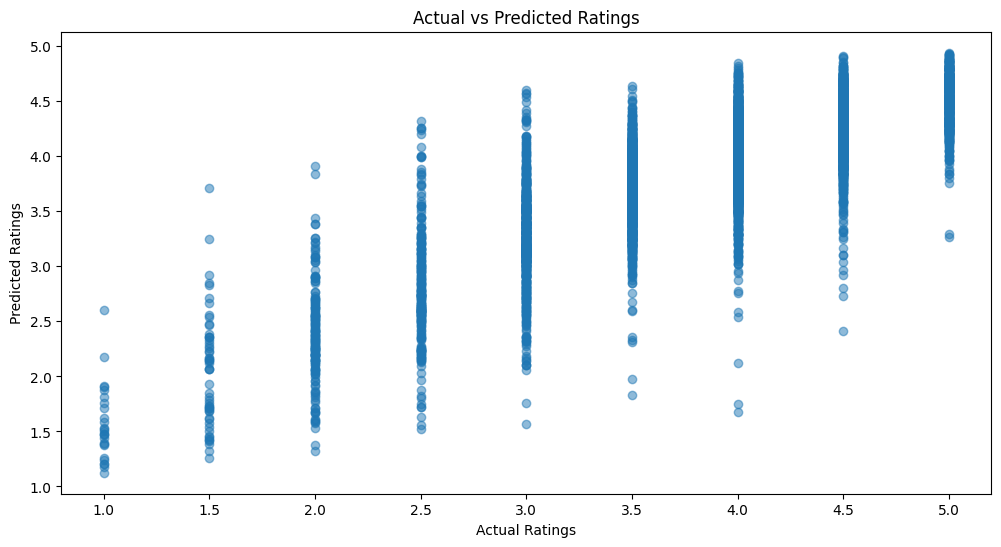

In [63]:
# Visalization
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs Predicted Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()